In [26]:
import sys
sys.path.insert(0, '../../wildlife-tools')
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import pandas as pd
import torchvision.transforms as T
import timm

from wildlife_datasets import datasets,  splits
from wildlife_tools.data import WildlifeDataset
from wildlife_tools.features import DeepFeatures
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.inference import KnnClassifier

import os
sys.path.append('..')
import pandas as pd
from wildlife_datasets import datasets
from wildlife_datasets.analysis import display_statistics
from wildlife_datasets.splits import visualize_split
from wildlife_datasets.splits import TimeCutoffSplit, TimeProportionSplit


In [3]:
# qwe = 0
# for d_name in datasets.names_all:
#     try:
#         # print(d_name.__name__, int(d_name.metadata['reported_n_individuals']))
#         # d_name.metadata
#         qwe += d_name.metadata['reported_n_individuals']
#         # print(qwe)
#     except:
#         # print("yes")

#         pass
# qwe

In [4]:
# dataset_attributes = dir(dataset)
# print(dataset_attributes)

In [5]:
# num_classes = dataset.num_classes
# num_classes

In [6]:
root = 'data/MacaqueFaces'

d = datasets.MacaqueFaces(root)
df = d.df

In [7]:
df = d.df

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df

,image_id,identity,path,date,category,year
0,0,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_1.jpg,2014-07-03,Contrast,2014
1,1,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_2.jpg,2014-07-03,Contrast,2014
2,2,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_3.jpg,2014-08-06,Contrast,2014
3,3,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_4.jpg,2014-08-06,Contrast,2014
4,4,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_5.jpg,2014-06-12,Contrast,2014
...,...,...,...,...,...,...
6275,6275,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6276.jpg,2014-02-19,Random,2014
6276,6276,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6277.jpg,2014-02-19,Random,2014
6277,6277,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6278.jpg,2014-03-21,Random,2014
6278,6278,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6279.jpg,2014-02-19,Random,2014


Number of identitites            34
Number of all animals            6280
Number of animals with one image 0
Number of unidentified animals   0
Images span                      1.4 years


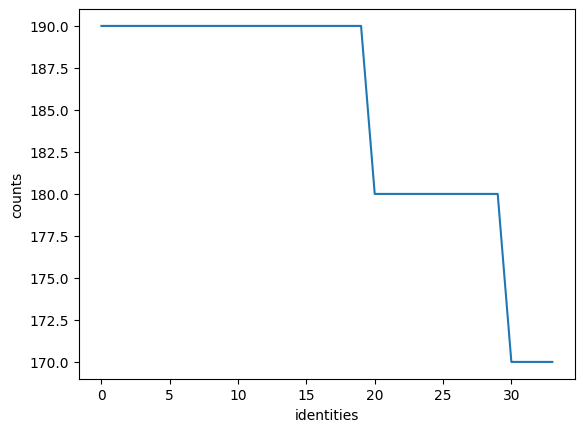

In [9]:
display_statistics(df)

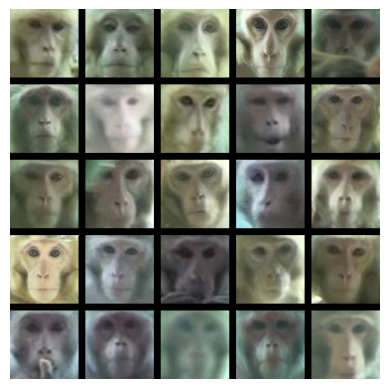

In [10]:
d.plot_grid(n_cols=5);

In [11]:
print(df.columns)

Index(['image_id', 'identity', 'path', 'date', 'category', 'year'], dtype='object')


In [12]:
unique_categories = df['identity'].unique()
print(unique_categories)

['Dan' 'Judd' 'Lala' 'Leah' 'Libby' 'Linz' 'Love' 'Lydia' 'Maj' 'Meesha'
 'Meg' 'Melody' 'Mindy' 'Ocelot' 'Rupee' 'Saphy' 'Serena' 'Shirley'
 'Sizzle' 'Sol' 'Sonja' 'Spice' 'Star' 'Sugar' 'Tamara' 'Tass' 'Tea'
 'Teal' 'Tes' 'Thyme' 'Umbrella' 'Ursula' 'Venus' 'Verity']


In [13]:
unique_categories = df['category'].unique()
print(unique_categories)

['Contrast' 'Expression' 'Good' 'Obscured' 'Rotated' 'Random']


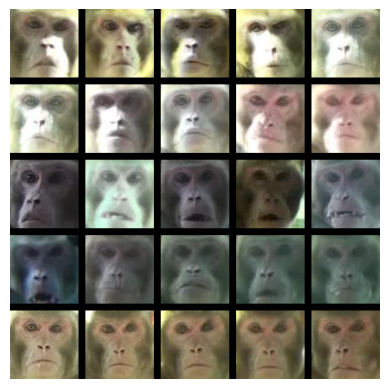

In [14]:
d.plot_grid(n_cols=5, idx=df['identity']=='Dan');

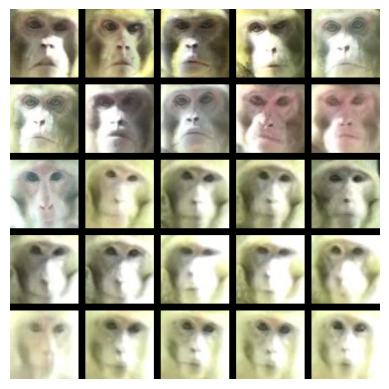

In [15]:
d.plot_grid(n_cols=5, idx=df['category']=='Contrast');

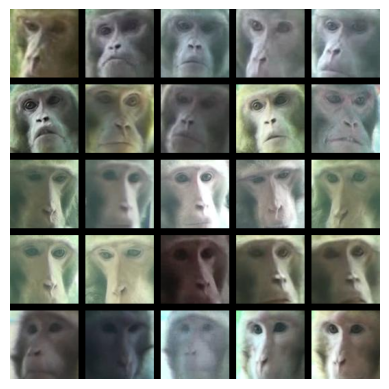

In [16]:
d.plot_grid(n_cols=5, idx=df['category']=='Rotated');

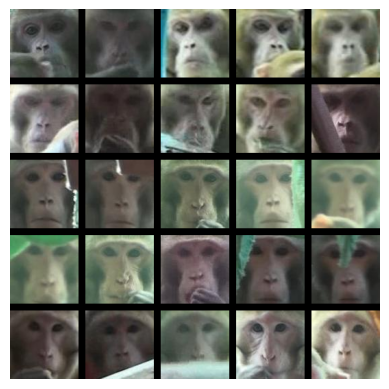

In [17]:
d.plot_grid(n_cols=5, idx=df['category']=='Obscured');

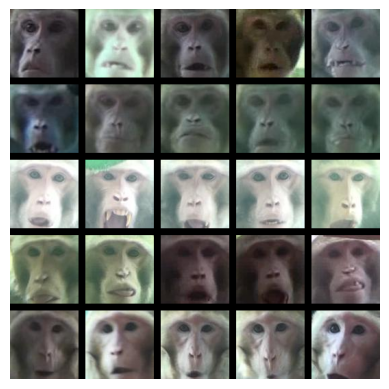

In [18]:
d.plot_grid(n_cols=5, idx=df['category']=='Expression');

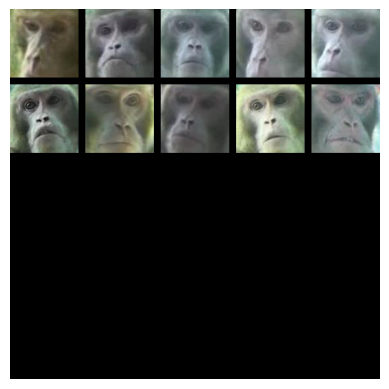

In [19]:
d.plot_grid(n_cols=5, idx=(df['category']=='Rotated')*(df['identity']=='Dan'));

Year 2014


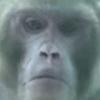

Year 2015


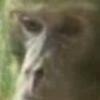

In [20]:
df_Dan = df[df['identity'] == 'Dan']
for year, df_Dan_year in df_Dan[df_Dan['category'] == 'Rotated'].sort_values('year').groupby('year'):
    print(f"Year {year}")
    display(datasets.get_image(os.path.join(root, df_Dan_year.iloc[0]['path']), max_size=300))

Year 2014


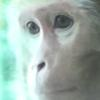

Year 2015


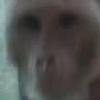

In [21]:
df_Dan = df[df['identity'] == 'Libby']
for year, df_Dan_year in df_Dan[df_Dan['category'] == 'Rotated'].sort_values('year').groupby('year'):
    print(f"Year {year}")
    display(datasets.get_image(os.path.join(root, df_Dan_year.iloc[0]['path']), max_size=300))

In [22]:
print(d)

In [23]:
df

,image_id,identity,path,date,category,year
0,0,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_1.jpg,2014-07-03,Contrast,2014
1,1,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_2.jpg,2014-07-03,Contrast,2014
2,2,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_3.jpg,2014-08-06,Contrast,2014
3,3,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_4.jpg,2014-08-06,Contrast,2014
4,4,Dan,MacaqueFaces\Contrast\Dan\Macaque_Face_5.jpg,2014-06-12,Contrast,2014
...,...,...,...,...,...,...
6275,6275,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6276.jpg,2014-02-19,Random,2014
6276,6276,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6277.jpg,2014-02-19,Random,2014
6277,6277,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6278.jpg,2014-03-21,Random,2014
6278,6278,Verity,MacaqueFaces\Random\Verity\Macaque_Face_6279.jpg,2014-02-19,Random,2014


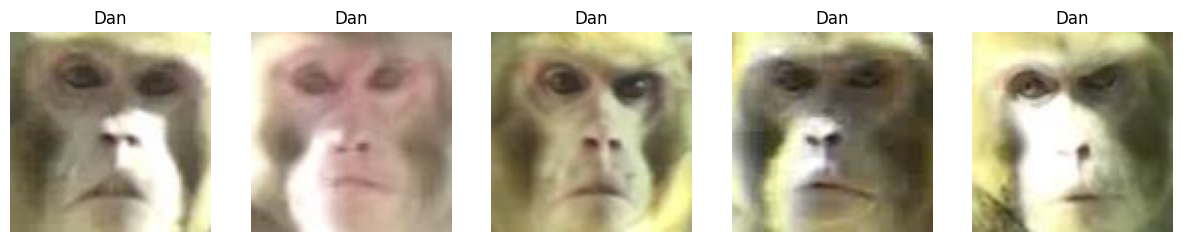

In [46]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset and organize images into query and database sets
dataset_path = 'D:\\Classroom\\Project\\p1\\wildlife-datasets\\data\\MacaqueFaces\\MacaqueFaces'

def load_images(folder_path):
    images = []
    labels = []
    for category_folder in os.listdir(folder_path):
        category_path = os.path.join(folder_path, category_folder)
        if os.path.isdir(category_path):
            for individual_folder in os.listdir(category_path):
                individual_path = os.path.join(category_path, individual_folder)
                if os.path.isdir(individual_path):
                    for filename in os.listdir(individual_path):
                        file_path = os.path.join(individual_path, filename)
                        if filename.endswith('.jpg'):
                            image = cv2.imread(file_path)
                            images.append(image)
                            labels.append(individual_folder)
    return images, labels

images, labels = load_images(dataset_path)

# Plotting grid of images with labels if images are available
if images:
    num_images = min(5, len(images))  # Ensure we don't try to plot more images than available
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].set_title(labels[i])
        axes[i].axis('off')

    plt.show()
else:
    print("No images found in the dataset.")


In [52]:
query_images = images[:100]
database_images = images[100:]
query_labels = labels[:100]
database_labels = labels[100:]

In [55]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

In [60]:
# Extract features from database images
database_features = []
for image in database_images:
    keypoints, descriptors = extract_sift_features(image)
    database_features.append((keypoints, descriptors))

# Initialize variables for accuracy calculation
total_queries = len(query_images)
correct_predictions = 0
c = 0
# Extract features from query images
for query_image, query_label in zip(query_images, query_labels):
    query_keypoints, query_descriptors = extract_sift_features(query_image)
    
    # Initialize dictionary to store similarity scores
    similarity_scores = {}
    
    # Compare query features with database features
    for i, (db_keypoints, db_descriptors) in enumerate(database_features):
        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        # Convert descriptors to the same type
        if db_descriptors is None:
            c+=1
            continue
        query_descriptors = query_descriptors.astype(np.float32)
        db_descriptors = db_descriptors.astype(np.float32)

        # Match features (e.g., using FLANN or brute-force matcher)
        # Compute similarity scores
        # Here, let's use brute-force matcher as an example
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(query_descriptors, db_descriptors, k=2)

        # Check if matches exist
        if len(matches) < 2:
            continue
        
        # Apply ratio test
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.75 * n.distance:
                good_matches.append(m)

        
        # Calculate similarity score (e.g., based on the number of good matches)
        similarity_score = len(good_matches)
        
        # Store similarity score for this database image
        similarity_scores[i] = similarity_score
    
    # Sort similarity scores in descending order
    sorted_scores = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Get top-k most similar images
    top_k = 5  # Adjust as needed
    top_k_indices = [index for index, _ in sorted_scores[:top_k]]
    
    # Get the predicted label for each top-k image
    predicted_labels = [database_labels[index] for index in top_k_indices]
    
    # Check if the query label matches any of the predicted labels
    if query_label in predicted_labels:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_queries
print("Accuracy:", accuracy)

Accuracy: 0.74
